## Step 1 - Project Statement

## Step 2 - Data Gathering

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.svm import SVC,SVR
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv(r"D:\Prashant\Project\ML 2nd Project\Crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


## Features

In [3]:
df["label"].value_counts() # check the crop list

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [4]:
df["label"].nunique() # number of crop mentioned in dataset

22

In [5]:
df.shape # shape of dataframe

(2200, 8)

## Step 3- Data Cleaning

In [6]:
df.duplicated(keep = "first").value_counts() # check out the duplicate value in dataset

False    2200
dtype: int64

In [7]:
# It shows only False quantity (False=2200 and rows also 2200)
# so we can say,there is no duplicate value available in data set.

In [8]:
df.isna().sum() # check null value count of every feature

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

## Data Splitting

In [9]:
# split the dataset into dependent and independent feature

x = df.drop("label", axis = 1)
y = df["label"]

In [10]:
x # independent feature

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [11]:
y # dependent feature

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [12]:
# Split the dependent as well as independent feature as a train and test data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1,stratify=y)

In [13]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1650, 7) (550, 7) (1650,) (550,)


## Step 4 - EDA

In [14]:
df.shape # Shape of dataset

(2200, 8)

In [15]:
# df.describe()
# Check out the discription of dataset,
# it shows the count, mean and standard deviation of all features separately with 
# minimum and maximum value available in that feature

df.describe() 

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [16]:
# df.info()
# It gives the information of dataset
# It shows the non null count and datatypes of every feature

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [17]:
df.isna().sum() # check null value count of every feature

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [18]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 120.4 KB


In [19]:
# as we see the info of independent features(x.info())
# no features have null values in it and 
# all features have int/float data type means all are in numerical format
# no one in object datatype 
# so there is no need of data preprocessing to independent data type

In [20]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2200 entries, 0 to 2199
Series name: label
Non-Null Count  Dtype 
--------------  ----- 
2200 non-null   object
dtypes: object(1)
memory usage: 17.3+ KB


In [21]:
y_train

1851        coconut
821          lentil
1170          mango
132           maize
1012         banana
           ...     
1024         banana
335     kidneybeans
1891        coconut
1562          apple
1657         orange
Name: label, Length: 1650, dtype: object

In [22]:
y_test

1377     watermelon
2089           jute
1213         grapes
958     pomegranate
2151         coffee
           ...     
1314     watermelon
1030         banana
418      pigeonpeas
1790         papaya
461      pigeonpeas
Name: label, Length: 550, dtype: object

## Label Encodeing

In [23]:
# Whenever we have ordinal dataset we use label encoding

In [24]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_train

array([ 4, 10, 12, ...,  4,  0, 16])

In [25]:
encoder = LabelEncoder()
y_test = encoder.fit_transform(y_test)
y_test

array([21,  8,  7, 19,  5, 16,  9, 17,  6,  3, 21, 16, 16,  6, 16,  1, 20,
        0, 12, 20, 18, 15,  9, 20, 13, 18,  9,  2,  2,  2, 16,  6, 18,  0,
        4,  5, 14,  6,  8,  3,  6,  4,  3, 11, 11, 13,  0, 18, 14, 17,  3,
        1,  0, 15, 21, 10, 12, 17, 18,  9,  1, 15,  3, 19,  7,  6, 14, 18,
        3, 15, 19, 13,  9,  0, 14, 10, 12, 21,  8,  4, 15, 21, 18, 16,  8,
       12, 20, 11, 21,  0, 18,  5, 19,  9,  2,  8, 19, 16, 19, 17, 13,  3,
        7,  5, 10, 14,  0,  6,  2,  6,  8,  5, 13, 20, 10, 17, 14,  1,  3,
       19,  2, 14, 16,  4,  7, 21, 19, 16, 18,  5, 11, 11,  5,  6, 14,  7,
        1,  6, 11, 13, 11,  4,  0, 16, 10,  0,  1,  1,  6, 10, 10,  3, 12,
        8,  8, 19,  0, 12, 12, 16, 14,  8, 14, 10,  5,  3, 17, 17, 12, 13,
       15,  1, 17,  2, 18, 20, 10, 21,  1, 20, 20,  8,  3, 14,  5, 14,  9,
       14, 21, 21, 20, 16, 19,  0, 20,  7, 12, 13,  6, 21,  2,  3,  7, 18,
        2,  8, 21, 10, 12,  1, 17, 19,  6,  3,  5, 21,  5,  4,  4, 12, 20,
       15, 10,  9, 17, 19

In [26]:
class_list = encoder.classes_
class_list

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

## Graphs

## 1. heatmap

<AxesSubplot:>

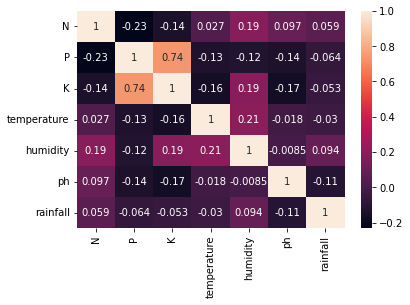

In [27]:
sns.heatmap(df.corr(), annot = True)

## Step 5 - Feature Engineering

## 1. Data Balancing

In [28]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='label', ylabel='count'>

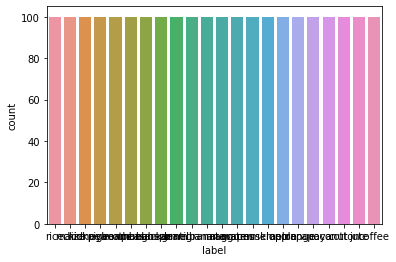

In [29]:
sns.countplot(df['label'])

In [30]:
df["label"].value_counts() # check out the count of each value in feature.

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [31]:
# from countplot/value count as we calculated above 
# we can say that data is already balanced data 
# so no need of further balancing

## 2.Outlier Handling

### 2.1 Column 1[N]

<AxesSubplot:xlabel='N'>

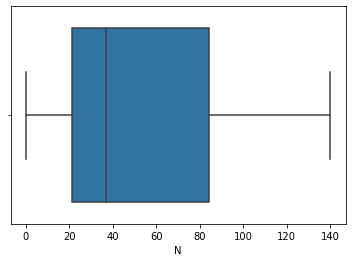

In [32]:
sns.boxplot(x_train["N"])

<AxesSubplot:xlabel='N'>

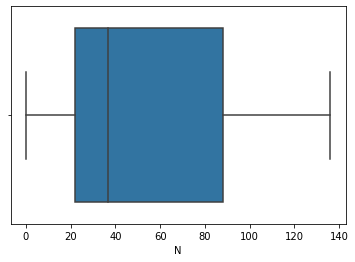

In [33]:
sns.boxplot(x_test["N"])

In [34]:
# Above boxplots clearly indicate that there is no outlier available in it.

### 2.2 Column 2 [P]

<AxesSubplot:xlabel='P'>

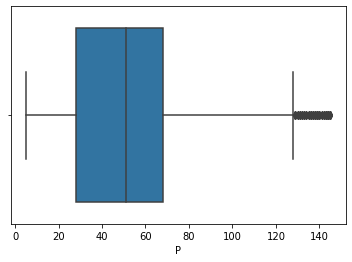

In [35]:
sns.boxplot(x_train["P"])

<AxesSubplot:xlabel='P'>

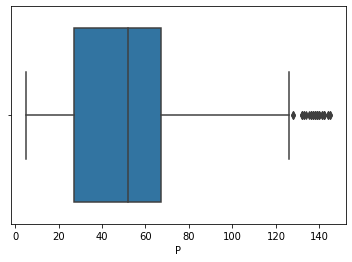

In [36]:
sns.boxplot(x_test["P"])

In [37]:
# The critical value of phosphorus depends on soil parameters like 
# type of soils and type of clay minerals

### 2.3 Column 3 [K]

<AxesSubplot:xlabel='K'>

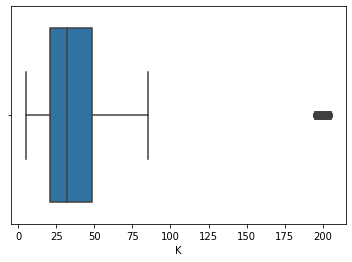

In [38]:
sns.boxplot(x_train["K"])

<AxesSubplot:xlabel='K'>

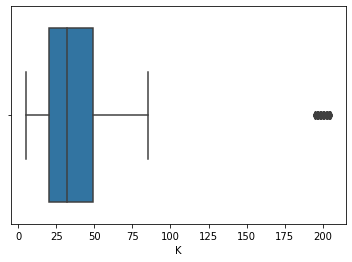

In [39]:
sns.boxplot(x_test["K"])

In [40]:
# The critical value of potassium depends on soil parameters like 
# type of soils and type of clay minerals

### 2.4 Column 4 [temperature]

<AxesSubplot:xlabel='temperature'>

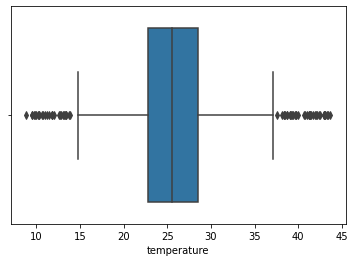

In [41]:
sns.boxplot(x_train["temperature"])

<AxesSubplot:xlabel='temperature'>

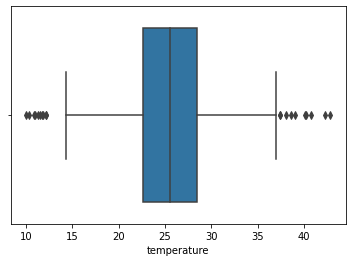

In [42]:
sns.boxplot(x_test["temperature"])

In [43]:
# 10 degree celcius to 45 degree celcius tempreture is normal 

### 2.5 Column 5 [humidity]

<AxesSubplot:xlabel='humidity'>

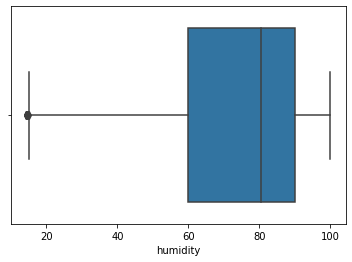

In [44]:
sns.boxplot(x_train["humidity"])

<AxesSubplot:xlabel='humidity'>

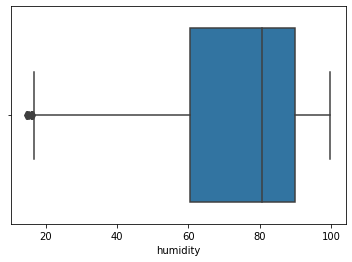

In [45]:
sns.boxplot(x_test["humidity"])

In [46]:
# Above boxplots indicates that there is no outlier

### 2.6 Column 6 [ph]

<AxesSubplot:xlabel='ph'>

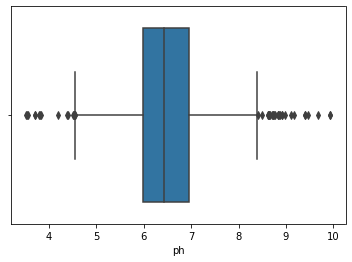

In [47]:
sns.boxplot(x_train["ph"])

<AxesSubplot:xlabel='ph'>

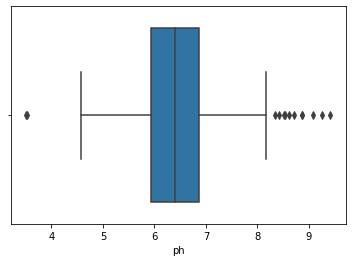

In [48]:
sns.boxplot(x_test["ph"])

In [49]:
# Most soils have pH values between 3.5 and 10. 
# In higher rainfall areas the natural pH of soils typically ranges from 5 to 7, 
# while in drier areas the range is 6.5 to 9.
# Acid soils have a pH below 7 and alkaline soils have a pH above 7. 
# Ultra-acidic soils (pH < 3.5) and very strongly alkaline soils (pH > 9) are rare.

### 2.7 Column 7 [rainfall]

<AxesSubplot:xlabel='rainfall'>

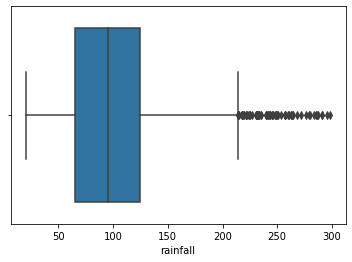

In [50]:
sns.boxplot(x_train["rainfall"])

<AxesSubplot:xlabel='rainfall'>

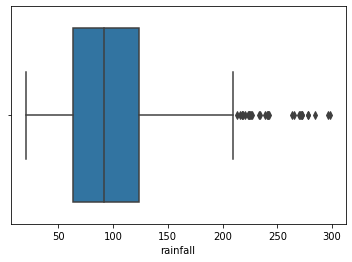

In [51]:
sns.boxplot(x_test["rainfall"])

In [52]:
# The highest rainfall of 156.3 cm (1563 mm) was recorded in Cherrapunji on June 16, 1995.
# Mawsynram, which receives the highest rainfall in India, 
# also in East Khasi Hills recorded 71 cm (710 mm), 
# the fifth-highest rainfall for 24 hours, on June 15 2022. 
# The highest rainfall record for Mawsynram is 94.5 cm (945 mm) (June 7, 1966).

## Step 6 - Feature Selection

## Filter Method

### 1. Information Gain

In [53]:
from sklearn.feature_selection import mutual_info_classif

In [54]:
arr = mutual_info_classif(x,y)
s1 = pd.Series(arr, index=x.columns)
s1.sort_values()

ph             0.686067
N              0.976447
temperature    1.017901
P              1.297922
rainfall       1.637358
K              1.642993
humidity       1.729954
dtype: float64

<AxesSubplot:>

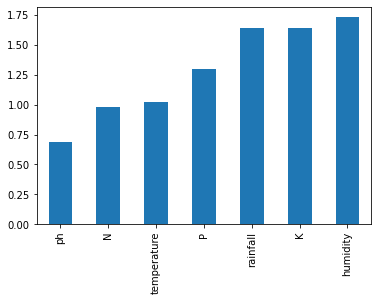

In [55]:
s1.sort_values().plot(kind='bar')

### 2. Fisher's Score

In [56]:
from skfeature.function.similarity_based import fisher_score

In [57]:
array = fisher_score.fisher_score(x.values,y)
print(array)

[4 2 5 6 0 3 1]


<AxesSubplot:>

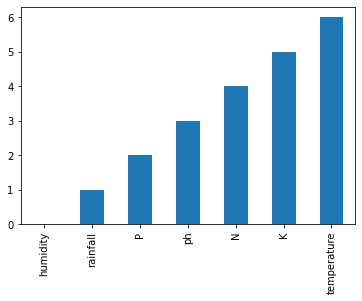

In [58]:
s1 = pd.Series(array, index=x_train.columns)
s1.sort_values().plot(kind='bar')

### 3. ANOVA Test

In [59]:
from sklearn.feature_selection import f_classif

In [60]:
f_val, p_val =  f_classif(x,y)
f_val

array([  897.56818633,  1885.65785918, 27238.36206708,   102.18698123,
        3103.70889122,    60.34403353,   605.52796614])

In [61]:
df_anova = pd.DataFrame({"Features":x.columns,"F-Val":f_val,"p_val":p_val})
df_anova.sort_values('F-Val')

,Features,F-Val,p_val
5,ph,60.344034,6.493162e-199
3,temperature,102.186981,4.019324e-305
6,rainfall,605.527966,0.000000e+00
0,N,897.568186,0.000000e+00
1,P,1885.657859,0.000000e+00
4,humidity,3103.708891,0.000000e+00
2,K,27238.362067,0.000000e+00


<AxesSubplot:>

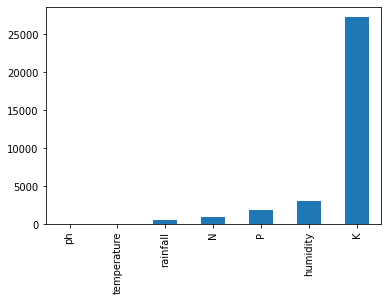

In [62]:
arr = pd.Series(f_val,index= x.columns)
arr.sort_values().plot(kind='bar')

### 4. Mean Absolute difference (MAD)

In [63]:
mad = np.abs(x-np.mean(x))
mad

,N,P,K,temperature,humidity,ph,rainfall
0,39.448182,11.362727,5.149091,4.736500,10.520965,0.033505,99.471881
1,34.448182,4.637273,7.149091,3.845782,8.837865,0.568616,123.191882
2,9.448182,1.637273,4.149091,2.611785,10.838984,1.370727,160.500592
3,23.448182,18.362727,8.149091,0.874852,8.676583,0.510921,139.400379
4,27.448182,11.362727,6.149091,5.486069,10.123094,1.158993,159.253685
...,...,...,...,...,...,...,...
2195,56.448182,19.362727,16.149091,1.158393,5.068511,0.310584,74.310852
2196,48.448182,38.362727,21.149091,1.800869,14.845417,0.382558,24.460955
2197,67.448182,20.362727,18.149091,1.484447,4.256656,0.106872,69.859183
2198,66.448182,21.362727,14.149091,0.656175,19.354385,0.289312,23.711637


In [64]:
array = mad.mean()
array

N              32.583560
P              24.878796
K              31.431412
temperature     3.799006
humidity       18.172998
ph              0.586927
rainfall       42.438337
dtype: float64

<BarContainer object of 7 artists>

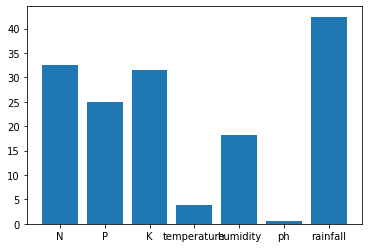

In [65]:
plt.bar(x_train.columns,array)

## Step 7 - Model Training & Model Evaluation

In [66]:
def train_model(model_name, x_train,x_test,y_train,y_test):
    """This function is for model trainingn"""    
    model_name.fit(x_train,y_train)   ### Model Training
    
    
    ############### model evaluation 
    
    ########### Test Data Evaluation 
    print('#'*50)
    print(f"TESTING DATA EVALUATION")
    y_pred_test = model_name.predict(x_test)
    acc_score = accuracy_score(y_test,y_pred_test)
    cnf_matrix = confusion_matrix(y_test,y_pred_test)
    clf_report = classification_report(y_test,y_pred_test)
    
    print(f"Accuracy_Score = {acc_score}")
    print(f"Confusion Matrix = \n{cnf_matrix}")
    print(f"Classification Report = \n{clf_report}")
    
    print('#'*50)
    print(f"TRAINING DATA EVALUATION")
    print()
    print()
    ########### training Data Evaluation 
    y_pred_train = model_name.predict(x_train)
    acc_score = accuracy_score(y_train,y_pred_train)
    cnf_matrix = confusion_matrix(y_train,y_pred_train)
    clf_report = classification_report(y_train,y_pred_train)
    
    print(f"Accuracy_Score = {acc_score}")
    print(f"Confusion Matrix = \n{cnf_matrix}")
    print(f"Classification Report = \n{clf_report}")
    
    return "Success"

## Step 8 - Model Evaluation

### 1. Logestic Regression

In [67]:
lgr_model = LogisticRegression(max_iter=1000)

train_model(lgr_model,x_train, x_test, y_train,y_test)

##################################################
TESTING DATA EVALUATION
Accuracy_Score = 0.9690909090909091
Confusion Matrix = 
[[25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 24  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 25 

'Success'

### 2. K Nearest Neighbour (KNN)

In [68]:
knn_model = KNeighborsClassifier()
train_model(knn_model,x_train, x_test, y_train,y_test)

##################################################
TESTING DATA EVALUATION
Accuracy_Score = 0.98
Confusion Matrix = 
[[25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0

'Success'

### 2.1 Hyper Parameter - K Nearest Neighbour

In [69]:
hyp= {'n_neighbors':np.arange(3,20),'p':[1,2]}

rscv_knn = RandomizedSearchCV(knn_model,hyp, cv=5,random_state=1)
rscv_knn.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'p': [1, 2]},
                   random_state=1)

In [70]:
knn_model_hyp = rscv_knn.best_estimator_
knn_model_hyp.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10, p=1)

In [71]:
train_model(knn_model_hyp,x_train, x_test, y_train,y_test)

##################################################
TESTING DATA EVALUATION
Accuracy_Score = 0.98
Confusion Matrix = 
[[25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0

'Success'

### 3. Decision Tree

In [72]:
dt_model = DecisionTreeClassifier(random_state=2)
train_model(dt_model,x_train, x_test, y_train,y_test)

##################################################
TESTING DATA EVALUATION
Accuracy_Score = 0.990909090909091
Confusion Matrix = 
[[25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  1  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 25  

'Success'

### 3.1 Hyper Parameter - Decision Tree

In [73]:
hyp= {'criterion':["gini","entropy"],
     'max_depth':np.arange(3,30),
     'min_samples_split':np.arange(2,30),
     'min_samples_leaf':np.arange(2,10)
     }

rscv = RandomizedSearchCV(dt_model,hyp, cv= 5)
rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [74]:
dt_model_hyp = rscv.best_estimator_
dt_model_hyp.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=18, min_samples_leaf=2, min_samples_split=19,
                       random_state=2)

In [75]:
train_model(dt_model_hyp,x_train, x_test, y_train,y_test)

##################################################
TESTING DATA EVALUATION
Accuracy_Score = 0.9872727272727273
Confusion Matrix = 
[[25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 25 

'Success'

## 4. Random Forest

In [76]:
rf_model = RandomForestClassifier(random_state=5)
train_model(rf_model,x_train, x_test, y_train,y_test)

##################################################
TESTING DATA EVALUATION
Accuracy_Score = 0.9963636363636363
Confusion Matrix = 
[[25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 25 

'Success'

### 4.1 Hyper Parameter - Random Forest

In [77]:
hyp= {'criterion':["gini","entropy"],
      "n_estimators": np.arange(10,400,10),
     'max_depth':np.arange(3,10),
     'min_samples_split':np.arange(2,20),
     'min_samples_leaf':np.arange(2,10)
     }

rscv_rf = RandomizedSearchCV(rf_model,hyp, cv= 5)
rscv_rf.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=5),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390])})

In [78]:
rf_model_hyp = rscv_rf.best_estimator_
rf_model_hyp.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=6,
                       n_estimators=380, random_state=5)

In [79]:
train_model(rf_model_hyp,x_train, x_test, y_train,y_test)

##################################################
TESTING DATA EVALUATION
Accuracy_Score = 0.9927272727272727
Confusion Matrix = 
[[25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 25 

'Success'

### 5. Support Vector Machine

In [80]:
svc_model = SVC(random_state=5)
train_model(svc_model,x_train, x_test, y_train,y_test)

##################################################
TESTING DATA EVALUATION
Accuracy_Score = 0.9781818181818182
Confusion Matrix = 
[[25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 24  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 25 

'Success'

## Final Model Selection

In [81]:
train_model(lgr_model,x_train, x_test, y_train,y_test)

##################################################
TESTING DATA EVALUATION
Accuracy_Score = 0.9690909090909091
Confusion Matrix = 
[[25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 24  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 25 

'Success'

In [82]:
import pickle
model = pickle.dump(lgr_model,open('model.pkl','wb'))

## User Define Function

In [83]:
def prediction(user_input_data):

    result = lgr_model.predict([user_input_data])
    class_list = encoder.classes_
    return (f"Crop Name = {class_list[result[0]]}")

In [84]:
user_input_data = x_test.iloc[90][::] # 90th row of x_test
user_input_data

N               30.000000
P               60.000000
K               21.000000
temperature     28.876676
humidity        62.490121
ph               5.457871
rainfall       182.268818
Name: 467, dtype: float64

In [85]:
prediction(user_input_data)

'Crop Name = pigeonpeas'

In [86]:
prediction([30,60,21,28.87,62.49,5.46,182.27])

'Crop Name = pigeonpeas'

In [87]:
prediction([81,18,50,28.87,62.49,5.46,182.27])

'Crop Name = coffee'

In [88]:
x_test.head(91)

,N,P,K,temperature,humidity,ph,rainfall
1377,81,18,50,26.440195,80.919343,6.507111,47.818476
2089,71,52,43,26.475495,73.961646,6.732826,180.251360
1213,16,139,203,17.828037,80.960934,6.275641,65.847488
958,4,19,43,18.071330,93.145549,5.779427,106.360202
2151,112,17,28,27.629755,61.260026,6.777418,196.649266
...,...,...,...,...,...,...,...
7,94,53,40,20.277744,82.894086,5.718627,241.974195
157,77,58,19,22.805603,56.507689,5.791650,101.595279
1349,98,25,52,25.280137,83.153937,6.224066,49.294566
1520,35,128,205,21.072734,93.565860,6.041054,107.873701


In [89]:
df.head(468)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
463,14,75,24,24.547578,57.341448,6.436160,118.360656,pigeonpeas
464,36,80,21,33.647696,48.414901,7.066087,100.467328,pigeonpeas
465,7,77,18,20.559126,60.548807,6.655918,191.089511,pigeonpeas
466,29,78,25,19.959917,59.331578,5.982855,195.787103,pigeonpeas


In [90]:
x_test.shape

(550, 7)

In [91]:
columns = x_test.columns.to_list()
print(len(columns))

7


In [92]:
columns_dict = {"col_name": columns}
columns_dict

{'col_name': ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']}

In [93]:
import json

In [94]:
with open('columns_name.json','w') as json_file:
    json.dump(columns_dict,json_file)